In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Churn_Modelling.csv


In [11]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/kaggle/input/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Male/Female
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

# Country column
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Epoch 1/100
8000/8000 [==============================] - 1s 163us/step - loss: 0.4877 - accuracy: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4300 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4234 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4190 - accuracy: 0.8146
Epoch 5/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4167 - accuracy: 0.8256
Epoch 6/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4149 - accuracy: 0.8296
Epoch 7/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4128 - accuracy: 0.8305
Epoch 8/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4116 - accuracy: 0.8320
Epoch 9/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4107 - accuracy: 0.8320
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 1s 127us/step - loss: 0.4003 - accuracy: 0.8345
Epoch 79/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4002 - accuracy: 0.8347
Epoch 80/100
8000/8000 [==============================] - 1s 127us/step - loss: 0.4002 - accuracy: 0.8347
Epoch 81/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3998 - accuracy: 0.8340
Epoch 82/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4005 - accuracy: 0.8369
Epoch 83/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4002 - accuracy: 0.8349
Epoch 84/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.3998 - accuracy: 0.8328
Epoch 85/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.3995 - accuracy: 0.8338
Epoch 86/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4000 - accuracy: 0.8347
Epoch 87/100
8000/8000 [==============================] - 1

In [12]:
cm

array([[1543,   52],
       [ 264,  141]])

In [13]:
import matplotlib.pyplot as plt


from sklearn.metrics import plot_confusion_matrix

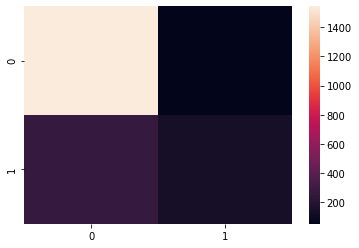

In [19]:
import seaborn as sns
sns.heatmap(cm, annot=True)